In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table, join
from astropy import units as u
from astropy import constants as const
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bothres = ['IC1199','IC1683','IC2247','NGC2347','NGC2410','NGC3815',
           'NGC5520','NGC5633','NGC5908','NGC5934','NGC5980','NGC6060',
           'NGC6186','NGC6314','NGC6478','UGC10123']
res7 = ['IC0944','NGC0496','NGC2253','NGC2639','NGC2906','NGC3811',
        'NGC3994','NGC4047','NGC4149','NGC5016','NGC5056','NGC5614',
        'NGC5953','NGC6004','NGC6301','NGC6361','NGC7738','UGC04132',
        'UGC05111','UGC09067','UGC10043','UGC10710']

[68.253504269999993, 69.72648289, 62.028699719999999, 63.749144370000003, 67.506345150000001, 53.594445260000001, 26.732293720000001, 33.377826910000003, 47.1345241, 82.710732780000001, 59.355879299999998, 63.239650689999998, 42.375116509999998, 95.862954630000004, 97.361590530000001, 53.758315250000003]
62.634175205 1.51829382602 2.12561135643


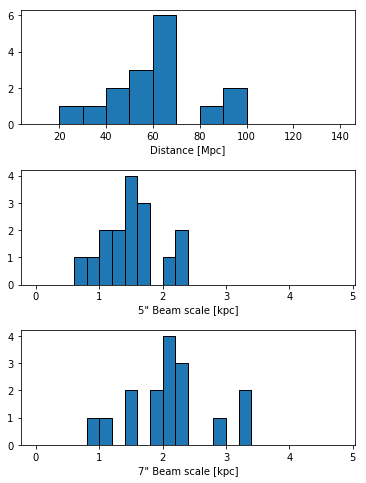

In [3]:
globaldir = '../dat_glob/'
califa = Table.read(globaldir+'external/edge_califa.csv', 
                    format='ascii.ecsv')
califa.add_index('Name')
galdist=[]
for gal in bothres:
    galdist.append(califa.loc[gal]['caDistMpc'])
beam5 = np.asarray(galdist)*5000/206265
beam7 = np.asarray(galdist)*7000/206265
print(galdist)
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,8))
ax1.hist(galdist,bins=np.arange(10, 150, 10), ec='black')
ax1.set_xlabel('Distance [Mpc]')
ax2.hist(beam5,bins=np.arange(0, 5, 0.2), ec='black')
ax2.set_xlabel('5" Beam scale [kpc]')
ax3.hist(beam7,bins=np.arange(0, 5, 0.2), ec='black')
ax3.set_xlabel('7" Beam scale [kpc]')
fig.subplots_adjust(hspace=0.4)
print(np.median(galdist),np.median(beam5),np.median(beam7))

In [4]:
def readcurve(gal, tablename, csvdir='../dat_prof/bbarolo/'):
    table = Table.read(csvdir+tablename, format = 'ascii.ecsv')
    galrows = table[table['bbName']==gal]
    rad  = galrows['bbRad']
    vrot = galrows['bbVrot']
    disp = galrows['bbVdisp']
    vrot_mi = galrows['bbVrot_e1']
    vrot_pl = galrows['bbVrot_e2']
    disp_mi = galrows['bbVdisp_e1']
    disp_pl = galrows['bbVdisp_e2']
    return [rad, vrot, vrot_mi, vrot_pl, disp, disp_mi, disp_pl]

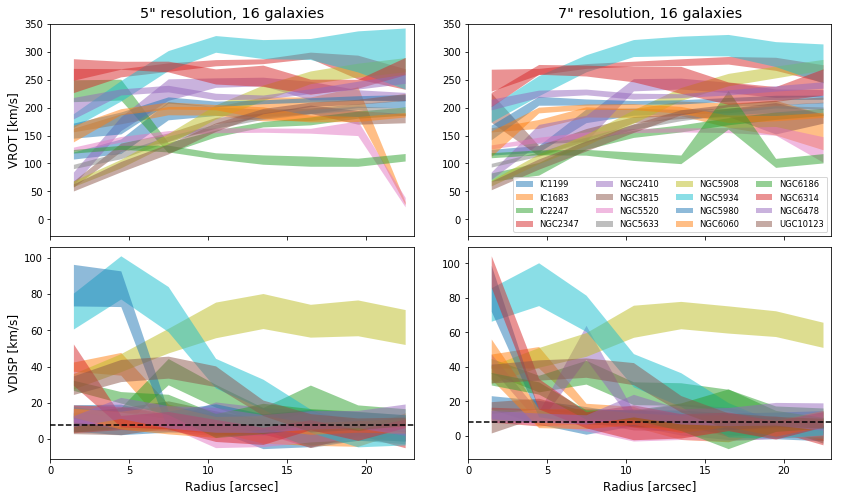

In [5]:
fig, axarr = plt.subplots(2,2,sharex=True,figsize=(14,8))
ngal = 0
for gal in bothres:
    dat5 = readcurve(gal, 'bb_smo5_fitvd_dilmsk.csv')
    axarr[0,0].fill_between(dat5[0], dat5[1]+dat5[2], dat5[1]+dat5[3], label=gal, alpha=0.5)
    axarr[1,0].fill_between(dat5[0], dat5[4]+dat5[5], dat5[4]+dat5[6], label=gal, alpha=0.5)
    dat7 = readcurve(gal, 'bb_smo7_fitvd_dilmsk.csv')
    axarr[0,1].fill_between(dat7[0], dat7[1]+dat7[2], dat7[1]+dat7[3], label=gal, alpha=0.5)
    axarr[1,1].fill_between(dat7[0], dat7[4]+dat7[5], dat7[4]+dat7[6], label=gal, alpha=0.5)
    ngal += 1
# Upper left
axarr[0,0].set_title('5" resolution, {} galaxies'.format(ngal),fontsize='x-large')
axarr[0,0].set_ylim(-30,350)
axarr[0,0].set_xlim(0,23)
axarr[0,0].set_ylabel('VROT [km/s]',fontsize='large')
# Lower left
axarr[1,0].axhline(8, color='k', ls='--')
axarr[1,0].set_xlabel('Radius [arcsec]',fontsize='large')
axarr[1,0].set_ylabel('VDISP [km/s]',fontsize='large')
# Upper right
axarr[0,1].set_title('7" resolution, {} galaxies'.format(ngal),fontsize='x-large')
axarr[0,1].set_ylim(-30,350)
axarr[0,1].legend(loc="lower right",ncol=4,fontsize='small')
# Lower right
axarr[1,1].axhline(8, color='k', ls='--')
axarr[1,1].set_xlabel('Radius [arcsec]',fontsize='large')
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.15)

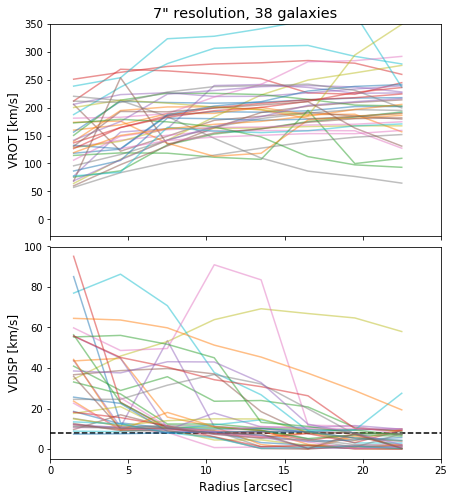

In [6]:
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(7,8))
ngal = 0
for gal in bothres+res7:
    dat7 = readcurve(gal, 'bb_smo7_fitvd_dilmsk.csv')
    axarr[0].plot(dat7[0], dat7[1], label=gal, alpha=0.5, marker=None)
    axarr[1].plot(dat7[0], dat7[4], label=gal, alpha=0.5, marker=None)
    ngal += 1
# Upper
axarr[0].set_title('7" resolution, {} galaxies'.format(ngal),fontsize='x-large')
axarr[0].set_ylim(-30,350)
axarr[0].set_ylabel('VROT [km/s]',fontsize='large')
axarr[0].set_xlim(0,25)
# Lower
axarr[1].axhline(8, color='k', ls='--', zorder=-2)
axarr[1].set_xlabel('Radius [arcsec]',fontsize='large')
axarr[1].set_ylabel('VDISP [km/s]',fontsize='large')
fig.subplots_adjust(hspace=0.05)

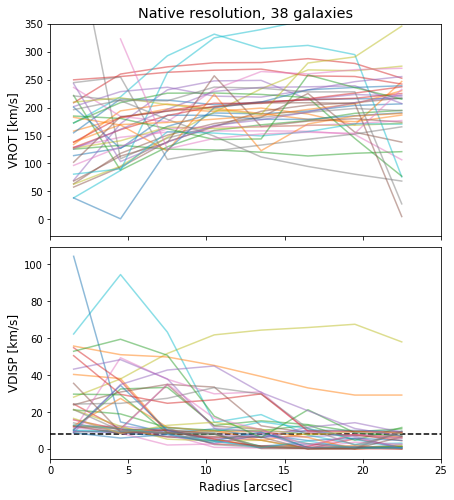

In [7]:
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(7,8))
ngal = 0
for gal in bothres+res7:
    dat = readcurve(gal, 'bb_natv_fitvd_dilmsk.csv')
    axarr[0].plot(dat[0], dat[1], label=gal, alpha=0.5, marker=None)
    axarr[1].plot(dat[0], dat[4], label=gal, alpha=0.5, marker=None)
    ngal += 1
# Upper
axarr[0].set_title('Native resolution, {} galaxies'.format(ngal),fontsize='x-large')
axarr[0].set_ylim(-30,350)
axarr[0].set_ylabel('VROT [km/s]',fontsize='large')
axarr[0].set_xlim(0,25)
# Lower
axarr[1].axhline(8, color='k', ls='--', zorder=-2)
axarr[1].set_xlabel('Radius [arcsec]',fontsize='large')
axarr[1].set_ylabel('VDISP [km/s]',fontsize='large')
fig.subplots_adjust(hspace=0.05)

In [8]:
def kappa(v_c, R):
    dv_c = (v_c.to(u.km/u.s)).value
    #dv_c_err = (v_c_err.to(u.km/u.s)).value
    dR=(R.to(u.km)).value
    deriv = np.gradient(dv_c,dR)/u.s
    #deriv_err = np.gradient(dv_c_err,dR)/u.s
    kappa_sqr = 2*v_c/R*(deriv+v_c/R)
    for n in range(len(kappa_sqr)):
        if kappa_sqr[n] < 0:
            kappa_sqr[n]=np.nan
    kappa_out = np.sqrt(kappa_sqr)
    #kappa_err = kappa_out**-1*np.sqrt((v_c_err/R*(deriv+v_c/R))**2+(v_c/R*(deriv_err+v_c_err/R))**2) 
    return kappa_out

def Sigma_crit(c_g, kappa):
    output = (kappa*c_g/np.pi/const.G).to(u.solMass/u.pc**2)
    return output

def jytok(jy, bmaj=1*u.arcsec, bmin=1*u.arcsec, freq=115.27*u.GHz):
    #omega_B = np.pi/(4*np.log(2)) * bmaj * bmin 
    # use 1 square arcsecond as the beam size
    omega_B = bmaj * bmin 
    convfac = (u.Jy).to(u.K, equivalencies=u.brightness_temperature(omega_B,freq))
    return jy*convfac

def Qcalc(gal, tablename, dmpc, inc, csvdir='../dat_prof/bbarolo/'):
    alphaco = 4.3 * u.solMass * u.s / (u.K * u.km * u.pc**2)
    table = Table.read(csvdir+tablename, format = 'ascii.ecsv')
    galrows = table[table['bbName']==gal]
    rkpc  = (galrows['bbRad']*dmpc).to(u.kpc, equivalencies=u.dimensionless_angles())
    vrot = galrows['bbVrot']
    disp = galrows['bbVdisp']
    sigcrit = Sigma_crit(disp, kappa(vrot,rkpc))
    dproj = jytok(galrows['bbIntens']*np.cos(inc))
    siggas = np.array(dproj)*u.km/u.s*u.K*alphaco
    return rkpc, sigcrit/siggas

Text(0,0.5,'$Q_{gas}$')

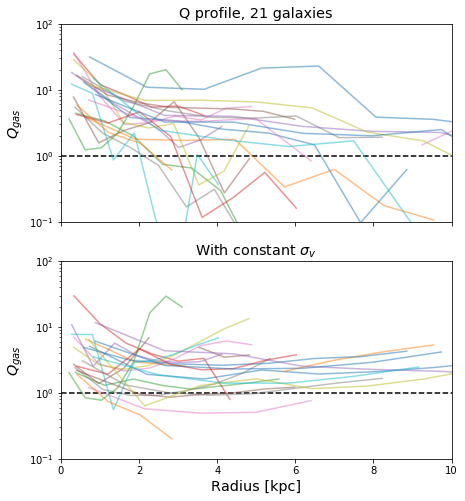

In [12]:
califa = Table.read('../dat_glob/external/edge_califa.csv',format='ascii.ecsv')
rfit = Table.read('../dat_glob/derived/edge_rfpars.csv',format='ascii.ecsv')
db = join(califa, rfit, keys='Name')
db.add_index('Name')
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(7,8))
ngal = 0
for gal in res7:
    dmpc = db.loc[gal]['caDistMpc']*u.Mpc
    inc = np.radians(db.loc[gal]['rfInc'])
    if (np.cos(inc) < 0.1):
        continue
    dat1 = Qcalc(gal, 'bb_smo7_fitvd_dilmsk.csv', dmpc, inc)
    axarr[0].plot(dat1[0], dat1[1], label=gal, alpha=0.5, marker=None)
    dat2 = Qcalc(gal, 'bb_smo7_fixvd_dilmsk.csv', dmpc, inc)
    axarr[1].plot(dat2[0], dat2[1], label=gal, alpha=0.5, marker=None)
    ngal += 1
# Upper
axarr[0].set_title('Q profile, {} galaxies'.format(ngal),fontsize='x-large')
axarr[0].set_yscale('log')
axarr[0].set_ylim(0.1,100)
axarr[0].axhline(1, color='k', ls='--', zorder=-2)
axarr[0].set_ylabel('$Q_{gas}$',fontsize='x-large')
axarr[0].set_xlim(0,10)
# Lower
axarr[1].set_title('With constant $\sigma_v$',fontsize='x-large')
axarr[1].set_yscale('log')
axarr[1].set_ylim(0.1,100)
axarr[1].axhline(1, color='k', ls='--', zorder=-2)
axarr[1].set_xlabel('Radius [kpc]',fontsize='x-large')
axarr[1].set_ylabel('$Q_{gas}$',fontsize='x-large')
#fig.subplots_adjust(hspace=0.05)

(0, 80)

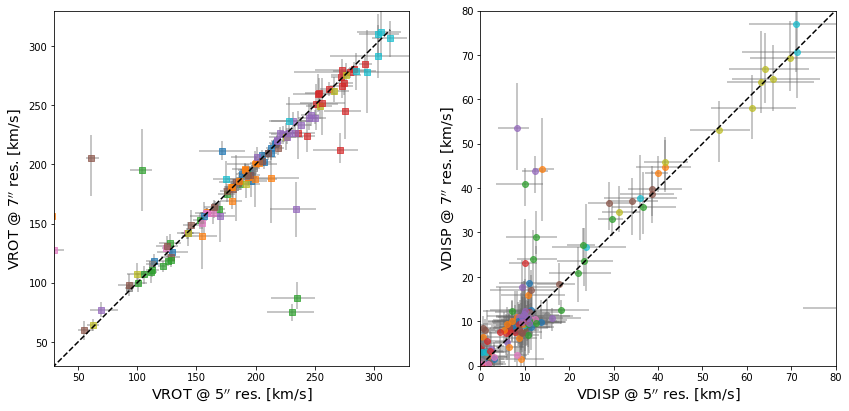

In [10]:
fig, axarr = plt.subplots(1,2,figsize=(14,8))
vrmin = 300
vrmax = 100
vdmin = 20
vdmax = 0
for gal in bothres:
    dat5 = readcurve(gal, 'bb_smo5_fitvd_dilmsk.csv')
    dat7 = readcurve(gal, 'bb_smo7_fitvd_dilmsk.csv')
    vrmin = min(vrmin,np.min(dat5[1]),np.min(dat7[1]))
    vrmax = max(vrmax,np.max(dat5[1]),np.max(dat7[1]))
    axarr[0].errorbar(dat5[1], dat7[1], xerr=[-dat5[2],dat5[3]],
                      yerr=[-dat7[2],dat7[3]], fmt='none', 
                      alpha=0.5, ecolor='dimgray', zorder=-1)
    axarr[0].scatter(dat5[1], dat7[1], label=gal, marker='s', alpha=0.7, zorder=1)
    vdmin = min(vdmin,np.min(dat5[4]),np.min(dat7[4]))
    vdmax = max(vdmax,np.max(dat5[4]),np.max(dat7[4]))
    axarr[1].errorbar(dat5[4], dat7[4], xerr=[-dat5[5],dat5[6]],
                      yerr=[-dat7[5],dat7[6]], fmt='none', 
                      alpha=0.5, ecolor='dimgray', zorder=-1)
    axarr[1].scatter(dat5[4], dat7[4], label=gal, marker='o', alpha=0.7, zorder=1)
# Left panel: VROT
axarr[0].set_aspect('equal')
axarr[0].set_xlabel('VROT @ 5$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[0].set_ylabel('VROT @ 7$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[0].plot([vrmin,vrmax],[vrmin,vrmax],ls='--',color='k', zorder=4)
axarr[0].set_xlim(30,330)
axarr[0].set_ylim(30,330)
# Right panel: VDISP
axarr[1].set_aspect('equal')
axarr[1].set_xlabel('VDISP @ 5$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[1].set_ylabel('VDISP @ 7$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
#axarr[1].set_xscale('log')
#axarr[1].set_yscale('log')
axarr[1].plot([vdmin,vdmax],[vdmin,vdmax],ls='--',color='k', zorder=4)
axarr[1].set_xlim(0,80)
axarr[1].set_ylim(0,80)

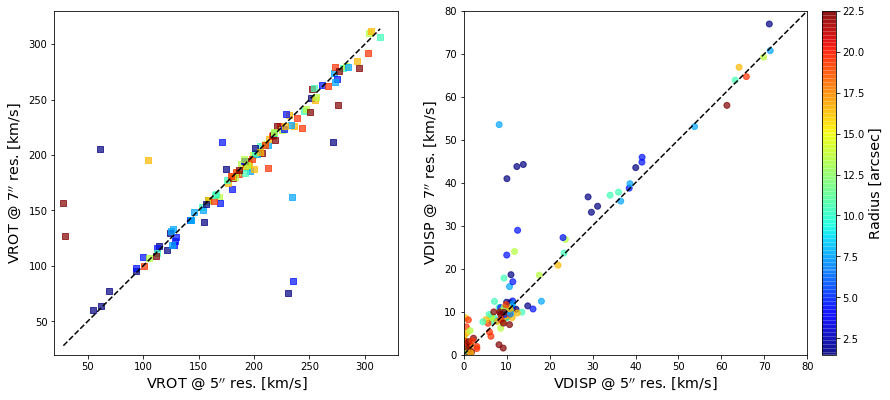

In [11]:
cmap = plt.cm.get_cmap('jet')
fig, axarr = plt.subplots(1,2,figsize=(14,8))
vrmin = 300
vrmax = 100
vdmin = 20
vdmax = 0
for gal in bothres:
    dat5 = readcurve(gal, 'bb_smo5_fitvd_dilmsk.csv')
    dat7 = readcurve(gal, 'bb_smo7_fitvd_dilmsk.csv')
    vrmin = min(vrmin,np.min(dat5[1]),np.min(dat7[1]))
    vrmax = max(vrmax,np.max(dat5[1]),np.max(dat7[1]))
    axarr[0].scatter(dat5[1], dat7[1], c=dat5[0], cmap=cmap, label=gal, marker='s', alpha=0.7, zorder=1)
    vdmin = min(vdmin,np.min(dat5[4]),np.min(dat7[4]))
    vdmax = max(vdmax,np.max(dat5[4]),np.max(dat7[4]))
    sc=axarr[1].scatter(dat5[4], dat7[4], c=dat5[0], cmap=cmap, label=gal, marker='o', alpha=0.7, zorder=1)
# Left panel: VROT
axarr[0].set_aspect('equal')
axarr[0].set_xlabel('VROT @ 5$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[0].set_ylabel('VROT @ 7$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[0].plot([vrmin,vrmax],[vrmin,vrmax],ls='--',color='k', zorder=4)
axarr[0].set_xlim(20,330)
axarr[0].set_ylim(20,330)
# Right panel: VDISP
axarr[1].set_aspect('equal')
axarr[1].set_xlabel('VDISP @ 5$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[1].set_ylabel('VDISP @ 7$^{\prime\prime}$ res. [km/s]',fontsize='x-large')
axarr[1].plot([vdmin,vdmax],[vdmin,vdmax],ls='--',color='k', zorder=4)
axarr[1].set_xlim(0,80)
axarr[1].set_ylim(0,80)
divider0 = make_axes_locatable(axarr[0])
dax = divider0.append_axes("right", size="4%", pad=0.2)
dax.axis('off')
divider1 = make_axes_locatable(axarr[1])
cax = divider1.append_axes("right", size="4%", pad=0.2)
cbar = plt.colorbar(sc, cax=cax, orientation='vertical')
cbar.set_label('Radius [arcsec]',fontsize='x-large')
fig.subplots_adjust(wspace=0.1)